In [1]:
import scipy.io as scio
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

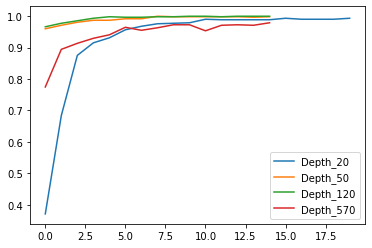

In [3]:
res50_skeleton_acc_20 = './训练记录/网络深度讨论/20代_15类_准确率_骨骼_20层.mat'
res50_skeleton_loss_20 = './训练记录/网络深度讨论/20代_15类_误差_骨骼_20层.mat'
res50_skeleton_acc_20_dat = scio.loadmat(res50_skeleton_acc_20)
res50_skeleton_loss_20_dat = scio.loadmat(res50_skeleton_loss_20)

res50_skeleton_acc_50 = './训练记录/网络深度讨论/15代_15类_准确率_骨骼_50层.mat'
res50_skeleton_loss_50 = './训练记录/网络深度讨论/15代_15类_误差_骨骼_50层.mat'
res50_skeleton_acc_50_dat = scio.loadmat(res50_skeleton_acc_50)
res50_skeleton_loss_50_dat = scio.loadmat(res50_skeleton_loss_50)

res50_skeleton_acc_120 = './训练记录/网络深度讨论/15代_15类_准确率_骨骼_120层.mat'
res50_skeleton_loss_120 = './训练记录/网络深度讨论/15代_15类_误差_骨骼_120层.mat'
res50_skeleton_acc_120_dat = scio.loadmat(res50_skeleton_acc_120)
res50_skeleton_loss_120_dat = scio.loadmat(res50_skeleton_loss_120)

res50_skeleton_acc_570 = './训练记录/网络深度讨论/15代_15类_准确率_骨骼_570层.mat'
res50_skeleton_loss_570 = './训练记录/网络深度讨论/15代_15类_误差_骨骼_570层.mat'
res50_skeleton_acc_570_dat = scio.loadmat(res50_skeleton_acc_570)
res50_skeleton_loss_570_dat = scio.loadmat(res50_skeleton_loss_570)

epoch = res50_skeleton_acc_50_dat['epoch'].tolist()
res50_val_acc_skeleton_20 = res50_skeleton_acc_20_dat['val_acc'].tolist()
res50_val_acc_skeleton_50 = res50_skeleton_acc_50_dat['val_acc'].tolist()
res50_val_acc_skeleton_120 = res50_skeleton_acc_120_dat['val_acc'].tolist()
res50_val_acc_skeleton_570 = res50_skeleton_acc_570_dat['val_acc'].tolist()

epoch2 = res50_skeleton_acc_20_dat['epoch'].tolist()
plt.plot(epoch2[0],res50_val_acc_skeleton_20[0],label='Depth_20')
plt.plot(epoch[0],res50_val_acc_skeleton_50[0],label='Depth_50')
plt.plot(epoch[0],res50_val_acc_skeleton_120[0],label='Depth_120')
plt.plot(epoch[0],res50_val_acc_skeleton_570[0],label='Depth_570')

plt.legend() 
plt.savefig("./训练记录/网络深度与准确率对比")

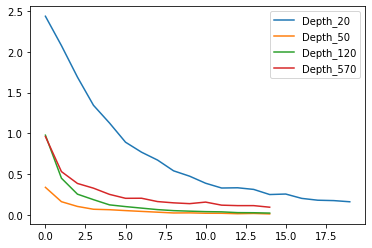

In [4]:
res50_val_loss_skeleton_20 = res50_skeleton_loss_20_dat['val_loss'].tolist()
res50_val_loss_skeleton_50 = res50_skeleton_loss_50_dat['val_loss'].tolist()
res50_val_loss_skeleton_120 = res50_skeleton_loss_120_dat['val_loss'].tolist()
res50_val_loss_skeleton_570 = res50_skeleton_loss_570_dat['val_loss'].tolist()

plt.plot(epoch2[0],res50_val_loss_skeleton_20[0],label='Depth_20')
plt.plot(epoch[0],res50_val_loss_skeleton_50[0],label='Depth_50')
plt.plot(epoch[0],res50_val_loss_skeleton_120[0],label='Depth_120')
plt.plot(epoch[0],res50_val_loss_skeleton_570[0],label='Depth_570')

plt.legend() 
plt.savefig("./训练记录/网络深度与误差对比")

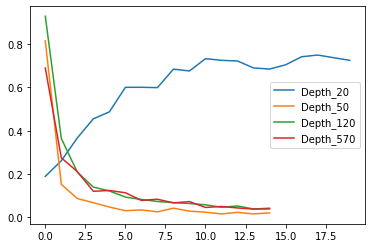

In [21]:
# 绘制误差曲线
# 20层
val_loss_20 = res50_skeleton_loss_20_dat['val_loss']
loss_20 = res50_skeleton_loss_20_dat['train_loss']
dis_20 = val_loss_20 - loss_20
dis_20 = abs(dis_20)
dis_20 = dis_20.tolist()

# 50层
val_loss_50 = res50_skeleton_loss_50_dat['val_loss']
loss_50 = res50_skeleton_loss_50_dat['train_loss']
dis_50 = val_loss_50 - loss_50
dis_50 = abs(dis_50)
dis_50 = dis_50.tolist()

# 120层
val_loss_120 = res50_skeleton_loss_120_dat['val_loss']
loss_120 = res50_skeleton_loss_120_dat['train_loss']
dis_120 = val_loss_120 - loss_120
dis_120 = abs(dis_120)
dis_120 = dis_120.tolist()

# 570层
val_loss_570 = res50_skeleton_loss_570_dat['val_loss']
loss_570 = res50_skeleton_loss_570_dat['train_loss']
dis_570 = val_loss_570 - loss_570
dis_570 = abs(dis_570)
dis_570 = dis_570.tolist()

plt.plot(epoch2[0],dis_20[0],label='Depth_20')
plt.plot(epoch[0],dis_50[0],label='Depth_50')
plt.plot(epoch[0],dis_120[0],label='Depth_120')
plt.plot(epoch[0],dis_570[0],label='Depth_570')
plt.legend()
# plt.savefig("./训练记录/VGG16/25代_5类_误差")
plt.savefig("./训练记录/网络深度对训测误差差距影响_骨骼")